In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dt = pd.read_csv('Cleaned_dataset.csv')

In [3]:
dt.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
dt.drop(['month', 'day', 'year'], axis=1, inplace=True)

In [5]:
dt.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
dt['Classes'] = np.where(dt['Classes'].str.contains('not fire'),0,1)

In [7]:
dt['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [8]:
#Independent and dependent features
X=dt.drop('FWI', axis=1)
y=dt['FWI']


In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [10]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [11]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

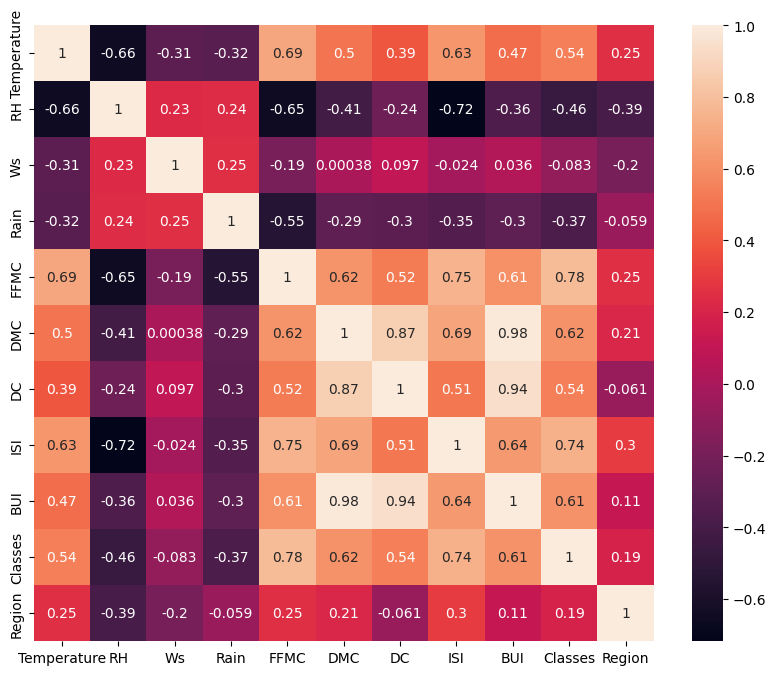

In [12]:
# Check for multicollinearity
plt.figure(figsize=(10,8))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [13]:
# get highly correlated features
def correlation(dataset, treshold):
    cor_columns = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > treshold:
                colname=corr_matrix.columns[i]
                cor_columns.add(colname)
    return cor_columns


In [14]:
## threshold must be set up by domain expertise
high_corr = correlation(X_train, 0.85)

In [15]:
# drop features when correlations is more than 0.85
X_train.drop(high_corr, axis=1, inplace=True)
X_test.drop(high_corr, axis=1, inplace=True)


In [16]:
### Feature Scaling or Standartization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
# Boxplot to understand effect of standard scaler


In [18]:
### Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()

In [19]:
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)

In [20]:
print("MAE = ", mae)
print("Scrore r^2 ", score)

MAE =  0.5468236465249978
Scrore r^2  0.9847657384266951


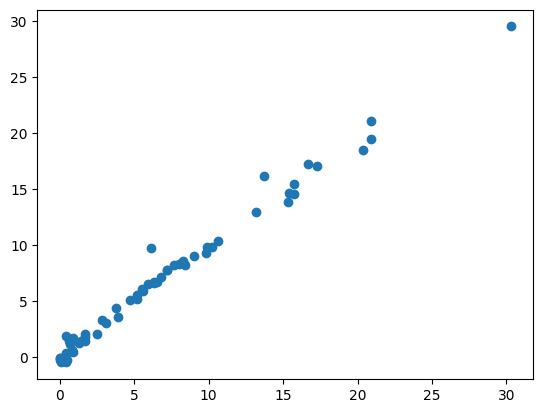

In [21]:
plt.scatter(y_test, y_pred)

In [22]:
## Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassoreg=Lasso()
lassoreg.fit(X_train_scaled,y_train)
y_pred = lassoreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)
print("MAE = ", mae)
print("Scrore r^2 ", score)

MAE =  1.133175994914409
Scrore r^2  0.9492020263112388


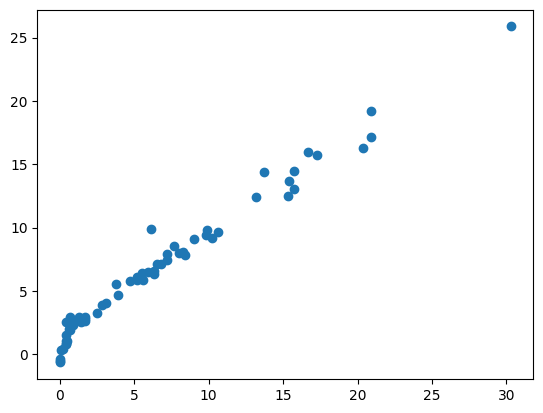

In [23]:
plt.scatter(y_test, y_pred)

MAE =  0.5642305340105715
Scrore r^2  0.9842993364555512


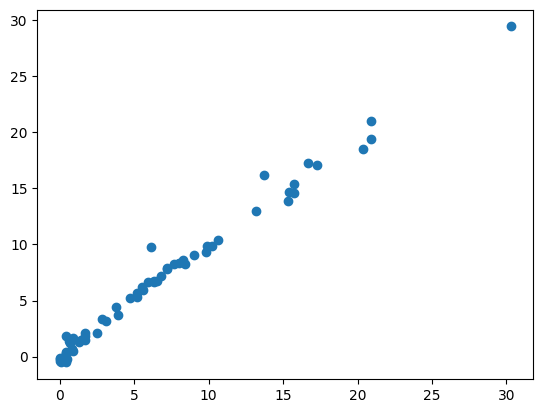

In [31]:
#Ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)
print("MAE = ", mae)
print("Scrore r^2 ", score)
plt.scatter(y_test, y_pred)

MAE =  1.8822353634896005
Scrore r^2  0.8753460589519703


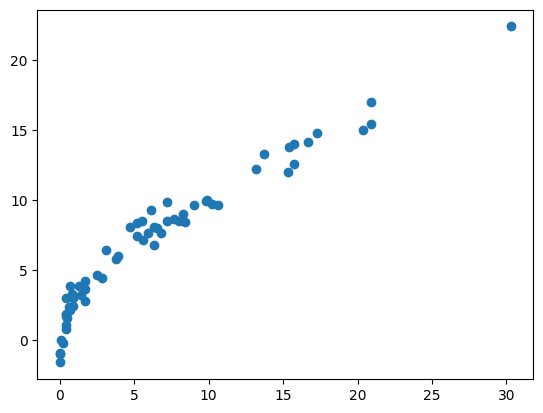

In [25]:
## Elasticnet Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
reg=ElasticNet()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)
print("MAE = ", mae)
print("Scrore r^2 ", score)
plt.scatter(y_test, y_pred)

# Cross validation lasso

In [26]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


MAE =  0.619970115826343
Scrore r^2  0.9820946715928275


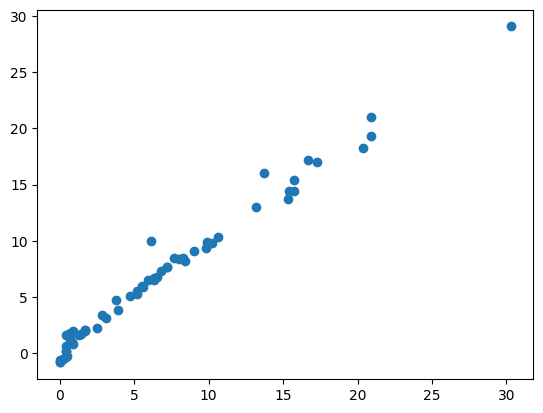

In [27]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)
print("MAE = ", mae)
print("Scrore r^2 ", score)

# Pickle the machine learning models, preprocessing model standardscaler

In [28]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [32]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [36]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))